# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


from Utils import evaluation_measures as ev

# Load Data using Pickle

In [2]:
network = 'airports'
path = '../Results/Variables/Evaluation Measures/'
results = pd.read_csv('../Results/All Backbones/Airports/' + network + '.csv')

In [3]:
results['edge'] = results.apply(lambda x: "%s-%s" % (min(x["source"], x["target"]), max(x["source"], x["target"])), axis = 1)
results = results.drop(columns=['source', 'target', 'weight'])

# Calulate for top k edges

In [4]:
# top k edges
k = results.shape[0]
k=500

# Calculate Kendall Tau Correlation

In [5]:
names = list(results.columns)
names.remove('edge')

corr = pd.DataFrame(columns=names, index=names, dtype='float')


for name1 in names:

    ranks1 = results[[name1, 'edge']]
    ranks1 = ranks1.sort_values(by=name1, ascending= 'alpha' in name1)

    for name2 in names:
            if name1 != name2:
                if pd.isnull(corr[name1][name2]):
                    ranks2 = results[[name2, 'edge']]
                    ranks2 = ranks2.sort_values(by=name2, ascending= 'alpha' in name2)  
                    corr[name1][name2] = corr[name2][name1] = stats.kendalltau(ranks1['edge'][:k].values, ranks2['edge'][:k].values)[0]


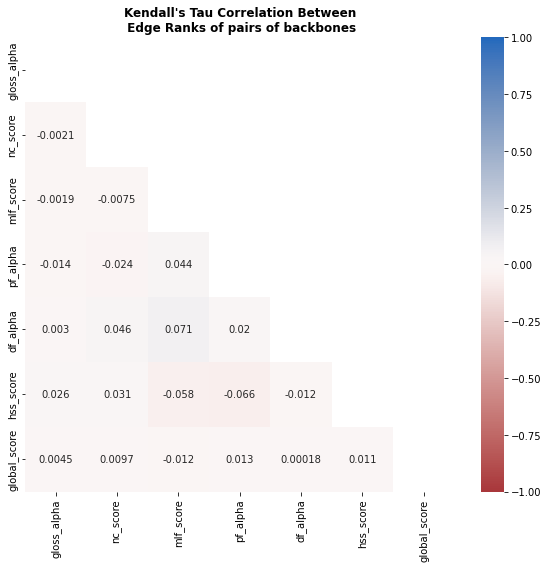

In [6]:
fig, ax = plt.subplots(figsize=(8, 8)) 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.title("Kendall's Tau Correlation Between\n Edge Ranks of pairs of backbones", fontsize = 12, weight="bold")
sns.heatmap(corr, mask= mask, ax= ax, annot= True, vmin=-1, vmax=1, cmap="vlag_r")
plt.tight_layout()

# Calculate RBO Similarity

In [14]:
names = list(results.columns)
names.remove('edge')

corr = pd.DataFrame(columns=names, index=names, dtype='float')

# parameter p
p=0.98

for name1 in names:

    ranks1 = results[[name1, 'edge']]
    ranks1 = ranks1.sort_values(by=name1, ascending= 'alpha' in name1)

    for name2 in names:
            if name1 != name2:
                if pd.isnull(corr[name1][name2]):
                    ranks2 = results[[name2, 'edge']]
                    ranks2 = ranks2.sort_values(by=name2, ascending= 'alpha' in name2)  
                    corr[name1][name2] = corr[name2][name1] = ev.get_rbo(list(ranks1['edge'][:k].values), list(ranks2['edge'][:k].values), p)



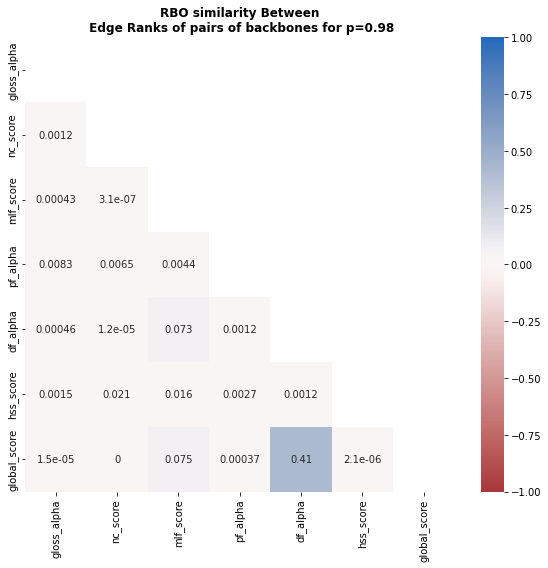

In [15]:
fig, ax = plt.subplots(figsize=(8, 8)) 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.title("RBO similarity Between\n Edge Ranks of pairs of backbones for p=" + str(p), fontsize = 12, weight="bold")
sns.heatmap(corr, mask= mask, ax= ax, annot= True, vmin=-1, vmax=1, cmap="vlag_r")
plt.tight_layout()

In [9]:
# results[['df_alpha', 'edge']].sort_values(by='df_alpha')[:5]

# Calculate Spearman Rank Correlation

In [10]:
names = list(results.columns)
names.remove('edge')

corr = pd.DataFrame(columns=names, index=names, dtype='float')

for name1 in names:

    ranks1 = results[[name1, 'edge']]
    ranks1 = ranks1.sort_values(by=name1, ascending= 'alpha' in name1)

    for name2 in names:
            if name1 != name2:
                if pd.isnull(corr[name1][name2]):
                    ranks2 = results[[name2, 'edge']]
                    ranks2 = ranks2.sort_values(by=name2, ascending= 'alpha' in name2)  
                    corr[name1][name2] = corr[name2][name1] = stats.spearmanr(list(ranks1['edge'][:k].values), list(ranks2['edge'][:k].values))[0]



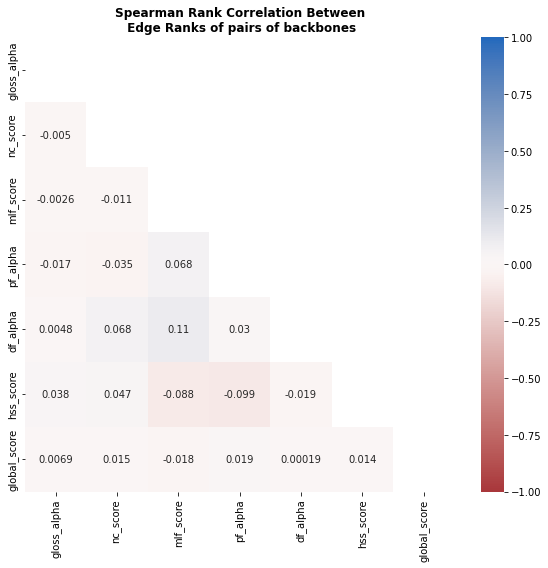

In [11]:
fig, ax = plt.subplots(figsize=(8, 8)) 

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = 1
plt.title("Spearman Rank Correlation Between\n Edge Ranks of pairs of backbones", fontsize = 12, weight="bold")
sns.heatmap(corr, mask= mask, ax= ax, annot= True, vmin=-1, vmax=1, cmap="vlag_r")
plt.tight_layout()